In [1]:
#Use Seaborn to create pair plots of chiari data

In [2]:
%pylab inline
import pandas as pd
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [3]:
#Syringomyelia
data=pd.read_table('../../data/urbizuCMI.txt',header=None,delim_whitespace=True)
data.columns=flatten([range(1,18),"chiari"])

#Shuffle data
data=data.reindex(random.permutation(data.index))
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [4]:
#data.loc[:,[1,12,17,"chiari"]]

,1,12,17,chiari
33,-0.110,43.3,59.0,0
117,1.000,37.1,64.0,1
5,-1.020,43.6,64.0,0
101,0.780,40.4,71.0,1
56,0.640,37.2,81.0,1
43,-0.190,49.5,70.0,0
47,-0.350,36.8,72.0,0
130,1.210,34.5,68.0,1
88,0.600,38.9,68.0,1
28,-0.670,42.2,65.0,0


In [5]:
#all_pairs=sns.pairplot(data,hue=1"chiari",vars=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17],palette=['red','blue'],diag_kind='kde')

In [6]:
#all_pairs.savefig('allpairs.png')

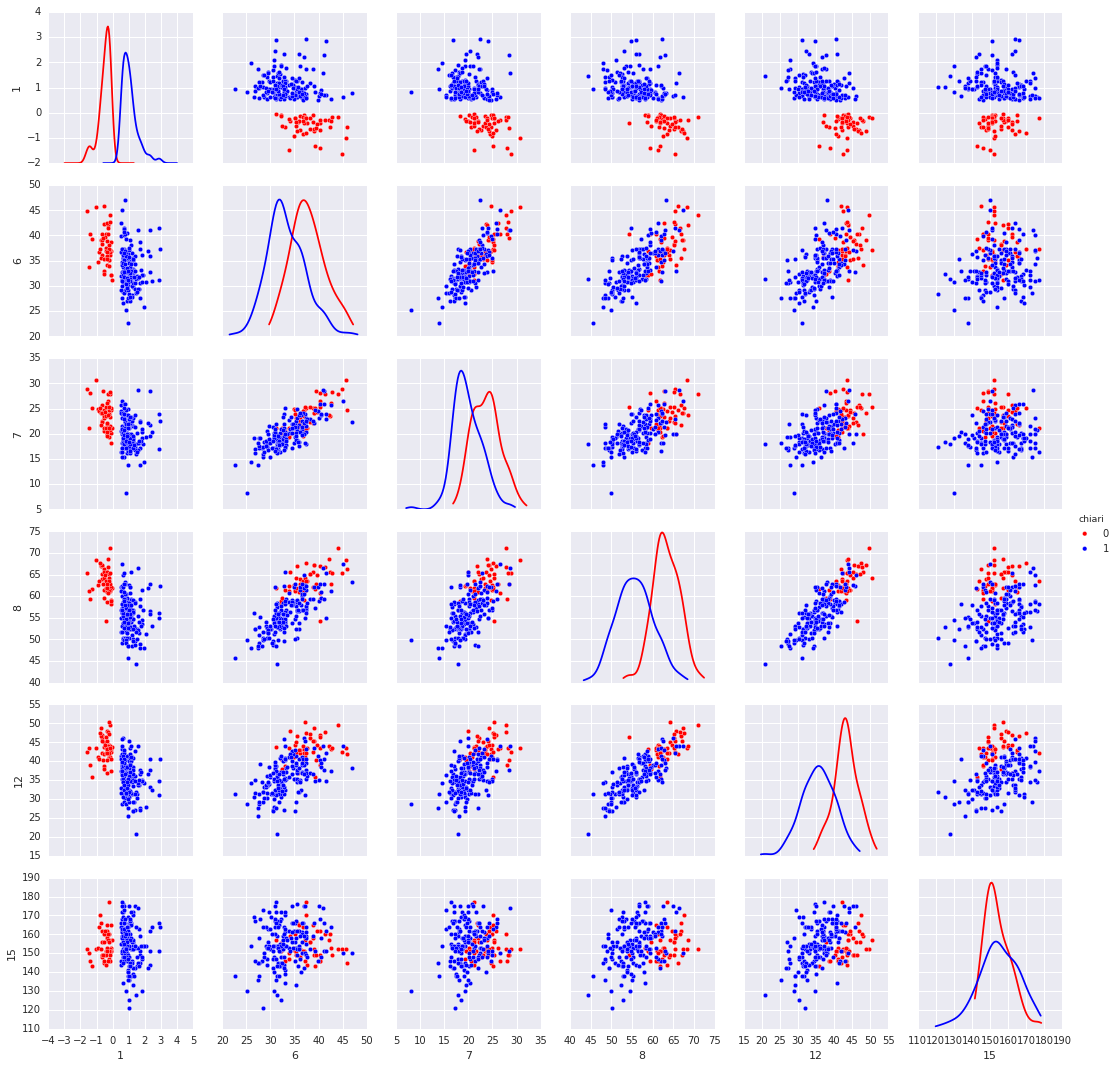

In [7]:
best_pairs=sns.pairplot(data,hue="chiari",vars=[1,6,7,8,12,15],palette=['red','blue'],diag_kind='kde')

/home/oevans/local/miniconda3/lib/python3.5/site-packages/seaborn/linearmodels.py:1285: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
/home/oevans/local/miniconda3/lib/python3.5/site-packages/seaborn/linearmodels.py:1351: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


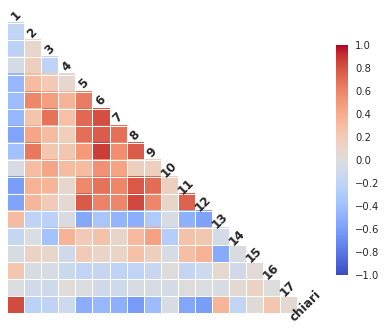

In [8]:
corr=sns.corrplot(data,annot=False)

In [9]:
import sys
sys.path.append('..')
from plot_learning_curve import plot_learning_curve
from sklearn.svm import LinearSVC,SVC


Plotting Learning Curves

On the left side the learning curve of a naive Bayes classifier is shown for
the digits dataset. Note that the training score and the cross-validation score
are both not very good at the end. However, the shape of the curve can be found
in more complex datasets very often: the training score is very high at the
beginning and decreases and the cross-validation score is very low at the
beginning and increases. On the right side we see the learning curve of an SVM
with RBF kernel. We can see clearly that the training score is still around
the maximum and the validation score could be increased with more training
samples.

From: http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#example-model-selection-plot-learning-curve-py



<module 'matplotlib.pyplot' from '/home/oevans/local/miniconda3/lib/python3.5/site-packages/matplotlib/pyplot.py'>

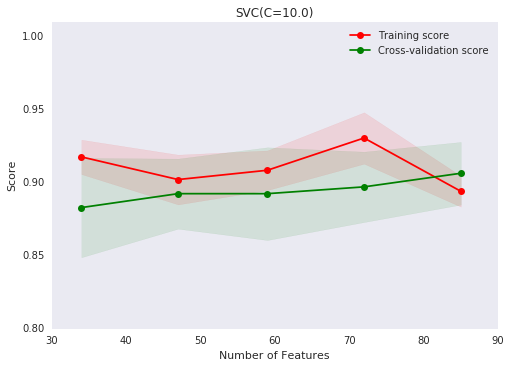

In [10]:
plot_learning_curve(SVC(1e2,kernel="linear"), 
                    "SVC(C=10.0)",
                    X.loc[:,[12,13,15]],y,
                    ylim=(0.8, 1.01),
                    train_sizes=linspace(.2,.5,5),
                    cv=5)

In [18]:
from plot_embedding import plot_embedding
import time
from sklearn import (manifold, decomposition, random_projection)

In [20]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [35]:
%run "../plot_embedding.py"

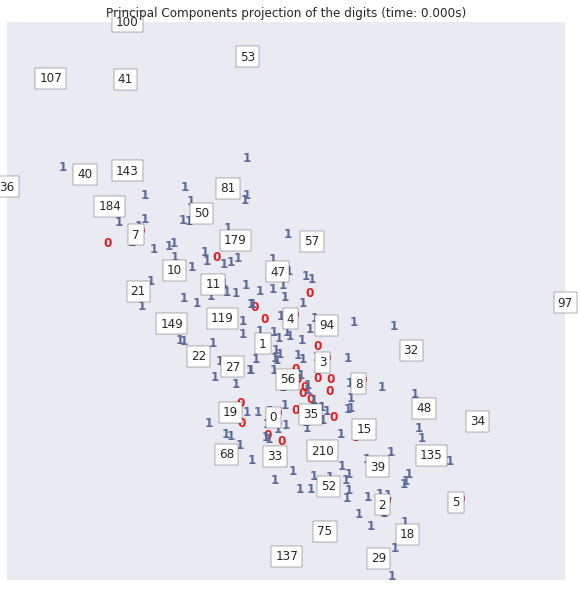

In [39]:
#Attempt to project 17-dimensional data onto a 2d plane to separate it
#From https://jmetzen.github.io/2015-01-29/ml_advice.html
#Based on http://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html#example-manifold-plot-lle-digits-py

X_pca = decomposition.TruncatedSVD(n_components=2).fit_transform(X)
stime = time.time()
plot_embedding(X_pca,y,
               "Principal Components projection of the digits (time: %.3fs)" % (time.time() - stime))